# Data Analysis for Linguistics Research Project
## Leave Takings

### Steps
1. Import CSV data
2. Clean each column
    - leave_taking
        - lowercase all characters
        - strip spaces
    - speaker_age 
        - turn into integers   
    - speaker_sex AND addressee_sex
        - lowercase
        - strip spaces
    - familiarity 
        - standardize into these categories:
            - relationship
            - prof_u
            - prof_f
            - unfamiliar
            - family
            - familiar
    - channel
        - standardize into:
            - phone
            - person
            - text
            
3. Data Transformation
    - decide on how to group ages
    - group/standardize some of the leave takings
    - maybe group text into phone and call it electronic
    - decide what to do about relationship -> family?
5. Analyze
    - print out some counts
    - bar graph of data
    - look at examples/assignment and decide what to group by


    

## 1. Import CSV data

In [155]:
import pandas as pd
data = pd.read_csv('data.csv')
data[::15]

,Dependent variable,Speaker age,Speaker sex,Addressee sex,Speaker/addressee familiarity,Channel of communication
0,Bye,21,M,F,In relationship,Phone
15,--,60,m,m,prof familiar,phone
30,alright bye,25,m,m,prof f,phone
45,thanks bye,40,m,m,prof unf,phone
60,okay bye,30,f,m,prof f,phone
75,thanks bye,35,m,m,prof unf,Phone
90,bye,21,m,f,relationship,phone
105,goodbye,19,f,m,In relationship,phone
120,love you bye,19,f,f,family,phone
135,goodbye,19,f,m,in relationship,phone


### 2. Clean each column
- leave_taking
    - lowercase all characters
    - strip spaces
- speaker_age 
    - turn into integers   
- speaker_sex AND addressee_sex
    - lowercase
    - strip spaces
- familiarity 
    - standardize into these categories:
        - relationship
        - prof_u
        - prof_f
        - unfamiliar
        - family
        - familiar
        - friends
- channel
    - standardize into:
        - phone
        - person
        - text


In [156]:
data.rename(inplace=True, columns={'Dependent variable': 'leave_taking', 'Speaker age': 'speaker_age', 'Speaker sex': 'speaker_sex', 'Addressee sex': 'addressee_sex', 'Speaker/addressee familiarity':'familiarity', 'Channel of communication': 'channel'})

In [157]:
data.dtypes

leave_taking     object
speaker_age       int64
speaker_sex      object
addressee_sex    object
familiarity      object
channel          object
dtype: object

In [158]:
#lowercase all data and strip surrounding spaces
data = data.apply(lambda x: x.astype(str).str.lower().str.strip())
data.head()

,leave_taking,speaker_age,speaker_sex,addressee_sex,familiarity,channel
0,bye,21,m,f,in relationship,phone
1,have a great day,35,f,f,professional unfamiliar,person
2,have a great day bye,35,f,f,professional unfamiliar,person
3,thanks bye,40,f,f,prof un,phone
4,thanks bye,23,m,f,prof un,person


In [159]:
data.familiarity.value_counts()

friends                    27
prof unf                   23
prof f                     22
prof familiar              21
family                     14
relationship                7
in relationship             7
prof un                     6
familiar                    4
unf                         4
prof u                      2
professional unfamiliar     2
prof f`                     1
Name: familiarity, dtype: int64

In [160]:
#standardize familiarity data
data.replace({'.*relationship.*': 'relationship', 'prof.* u.*': 'prof_u', 'prof.* f.*': 'prof_f', 'friends': 'friend', 'unf': 'unfamiliar'}, regex=True, inplace=True)
data.familiarity.unique()

array(['relationship', 'prof_u', 'unfamiliar', 'family', 'friend',
       'prof_f', 'familiar'], dtype=object)

In [161]:
data.speaker_age = pd.to_numeric(data.speaker_age)

In [162]:
data[::15]

,leave_taking,speaker_age,speaker_sex,addressee_sex,familiarity,channel
0,bye,21,m,f,relationship,phone
15,--,60,m,m,prof_f,phone
30,alright bye,25,m,m,prof_f,phone
45,thanks bye,40,m,m,prof_u,phone
60,okay bye,30,f,m,prof_f,phone
75,thanks bye,35,m,m,prof_u,phone
90,bye,21,m,f,relationship,phone
105,goodbye,19,f,m,relationship,phone
120,love you bye,19,f,f,family,phone
135,goodbye,19,f,m,relationship,phone


## 3. Data Transformation
- decide on how to group ages
- maybe group text into phone and call it electronic
- decide what to do about relationship -> family?

In [163]:
data.speaker_age.value_counts().sort_index()

5      3
12     2
16     2
17     1
18     3
19    26
20     5
21    15
22     1
23     2
25    15
28     3
30    15
35     5
40     5
42     1
45     6
47     1
50    10
55     7
60    10
65     2
Name: speaker_age, dtype: int64

In [164]:
data['speaker_age_category'] = pd.cut(data['speaker_age'], bins=[0,18, 25, 45, 100], labels=['kid', 'young_adult', 'adult', 'old'])


In [165]:
data.speaker_age_category.value_counts()

young_adult    64
adult          35
old            30
kid            11
Name: speaker_age_category, dtype: int64

- group/standardize some of the leave takings

In [166]:
data.leave_taking.value_counts()

bye                                  29
thanks bye                           21
okay bye                              8
thanks                                8
love you bye                          5
alright bye                           5
thank you                             5
goodbye                               5
--                                    4
ok bye                                4
see you soon                          3
see ya                                2
buh bye                               2
thank you buh bye                     2
see you                               2
thanks buh bye                        2
thank you bye                         2
alright take care bye [name]          1
have a great day bye                  1
thank you so much                     1
talk to you later bye                 1
alright thanks bye                    1
thanks darlin bye bye                 1
thanks bye and have a good day        1
thanks a lot bye                      1


In [167]:
data.head()

,leave_taking,speaker_age,speaker_sex,addressee_sex,familiarity,channel,speaker_age_category
0,bye,21,m,f,relationship,phone,young_adult
1,have a great day,35,f,f,prof_u,person,adult
2,have a great day bye,35,f,f,prof_u,person,adult
3,thanks bye,40,f,f,prof_u,phone,adult
4,thanks bye,23,m,f,prof_u,person,young_adult


In [168]:
data['leave_taking_category'] = data['leave_taking']

data.leave_taking_category.replace('(.*thank.*)','thank', regex=True, inplace=True)
data.leave_taking_category.replace('(.*see.*)','see later', regex=True, inplace=True)
data.leave_taking_category.replace('(.*talk.*)','talk later', regex=True, inplace=True)

# data.leave_taking_category.replace('.*alright.*','alright', regex=True, inplace=True)
# data.leave_taking_category.replace('.*ok.*','ok', regex=True, inplace=True)
data.leave_taking_category.replace('.*ok.*|.*alright.*','ok', regex=True, inplace=True)
data.leave_taking_category.replace('--','NULL', regex=True, inplace=True)
data.leave_taking_category.replace('.*love.*','love', regex=True, inplace=True)
data.leave_taking_category.replace('(.*good day.*)|(.*great day.*)','good day', regex=True, inplace=True)
data.leave_taking_category.replace('(.*bye.*)','bye', regex=True, inplace=True)

data.leave_taking_category.value_counts()

thank         54
bye           40
ok            20
see later      8
love           6
talk later     4
NULL           4
good day       4
Name: leave_taking_category, dtype: int64

In [169]:
data.channel.replace('text', 'phone', inplace=True)

## 5. Analyze
- print out some counts
- bar graph of data
- look at examples/assignment and decide what to group by

In [170]:
counts = pd.DataFrame(data.leave_taking_category.value_counts())
counts['percentage'] = counts['leave_taking_category']/ sum(counts['leave_taking_category']) * 100
counts

,leave_taking_category,percentage
thank,54,38.571429
bye,40,28.571429
ok,20,14.285714
see later,8,5.714286
love,6,4.285714
talk later,4,2.857143
NULL,4,2.857143
good day,4,2.857143


In [171]:
data = data.reindex(columns = ['leave_taking', 'leave_taking_category', 'speaker_age','speaker_age_category', 'speaker_sex', 'addressee_sex',
       'familiarity', 'channel'])

In [172]:
data[::15]

,leave_taking,leave_taking_category,speaker_age,speaker_age_category,speaker_sex,addressee_sex,familiarity,channel
0,bye,bye,21,young_adult,m,f,relationship,phone
15,--,NULL,60,old,m,m,prof_f,phone
30,alright bye,ok,25,young_adult,m,m,prof_f,phone
45,thanks bye,thank,40,adult,m,m,prof_u,phone
60,okay bye,ok,30,adult,f,m,prof_f,phone
75,thanks bye,thank,35,adult,m,m,prof_u,phone
90,bye,bye,21,young_adult,m,f,relationship,phone
105,goodbye,bye,19,young_adult,f,m,relationship,phone
120,love you bye,love,19,young_adult,f,f,family,phone
135,goodbye,bye,19,young_adult,f,m,relationship,phone


Text(0.5,1,'Total Percentage of Each Token')

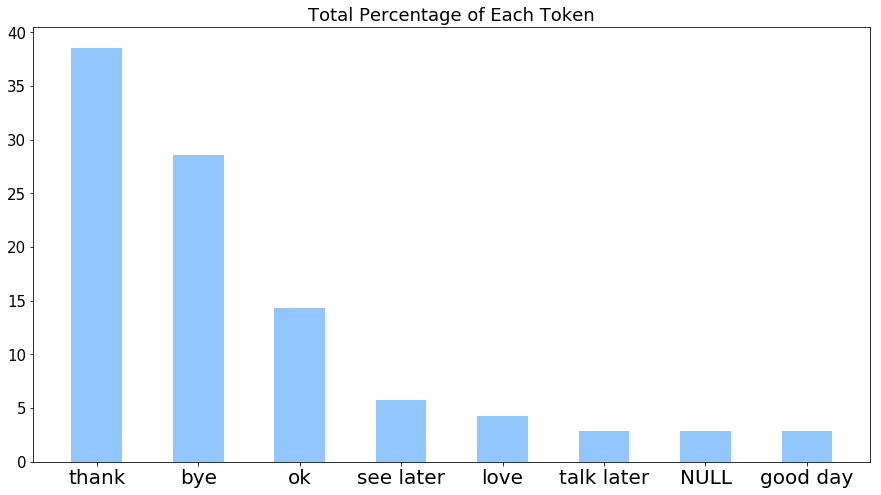

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
fig = plt.figure(1, [15, 8])
counts = data.leave_taking_category.value_counts()
token = counts.index
count = counts / sum(counts) * 100
plt.style.use('seaborn-pastel')
plt.bar(np.arange(len(token)), count, width=.5)
plt.xticks(np.arange(len(token)), token, fontsize=20)
plt.title('Total Percentage of Each Token')

## Sex

In [174]:
data_m_f = pd.DataFrame(columns = ['token', 'male', 'female'])
data_m_f.token = data.leave_taking_category
data_m_f.head(10)

,token,male,female
0,bye,NaN,NaN
1,good day,NaN,NaN
2,good day,NaN,NaN
3,thank,NaN,NaN
4,thank,NaN,NaN
5,bye,NaN,NaN
6,bye,NaN,NaN
7,bye,NaN,NaN
8,see later,NaN,NaN
9,ok,NaN,NaN


In [175]:
ad_s = data['leave_taking_category'].groupby([data['leave_taking_category'], data['addressee_sex']]).count()
ad_s = ad_s.unstack().fillna(0)
ad_s_total_m = ad_s.m.sum()
ad_s_total_f = ad_s.f.sum()
ad_s_totals = pd.DataFrame(ad_s.sum(), columns=['total'])
ad_s.m = round(ad_s.m / ad_s_total_m * 100)
ad_s.f = round(ad_s.f / ad_s_total_f * 100)
ad_s.name = 'token by addressee sex'
ad_s_df = pd.DataFrame(ad_s)

ad_s_df = ad_s_df.sort_values(by='f')
ad_s_df

addressee_sex,f,m
leave_taking_category,,
talk later,0.0,5.0
NULL,2.0,4.0
good day,4.0,2.0
love,5.0,4.0
ok,7.0,19.0
see later,12.0,1.0
thank,33.0,42.0
bye,37.0,23.0


In [176]:
ad_s_totals

,total
addressee_sex,
f,57.0
m,83.0


In [177]:

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


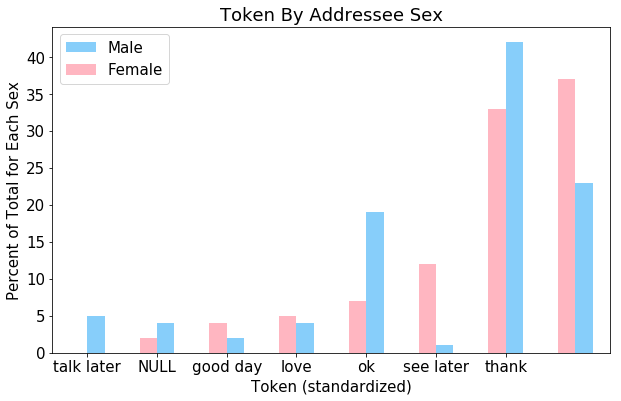

In [178]:
my_colors = ['lightpink', 'lightskyblue']
ad_s_df.plot.bar(rot=0, color = my_colors)
plt.xticks(ind, ad_s_df.index)
plt.title('Token By Addressee Sex')
plt.xlabel('Token (standardized)')
plt.ylabel('Percent of Total for Each Sex')
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 15})

In [179]:
counts = data['leave_taking_category'].groupby([data['leave_taking_category'], data['speaker_sex']]).count()
counts = counts.unstack().fillna(0)
total_m = counts.m.sum()
total_f = counts.f.sum()
totals = pd.DataFrame(counts.sum(), columns=['total'])
counts.m = round(counts.m / total_m * 100)
counts.f = round(counts.f / total_f * 100)
counts.name = 'token by gender'
c_df = pd.DataFrame(counts)

c_df = c_df.sort_values(by='f')
totals

,total
speaker_sex,
f,102.0
m,38.0


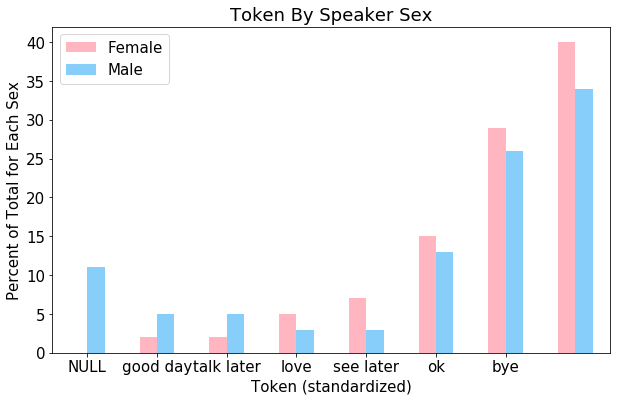

In [180]:
my_colors = ['lightpink', 'lightskyblue']
c_df.plot.bar(rot=0, color = my_colors)
plt.xticks(ind, c_df.index)
plt.title('Token By Speaker Sex')
plt.xlabel('Token (standardized)')
plt.ylabel('Percent of Total for Each Sex')
plt.legend(('Female', 'Male'))
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 15})

## Familiarity

In [181]:
familiarity = data['leave_taking_category'].groupby([data['leave_taking_category'], data['familiarity']]).count()
familiarity = familiarity.unstack().fillna(0)
familiarity_df = pd.DataFrame(familiarity)
familiarity_df.columns.name=None
familiarity_df.index.name=None
familiarity_df
smaller = pd.DataFrame(columns = familiarity_df.columns, index = familiarity_df.index)
smaller.unfamiliar = familiarity_df.unfamiliar
smaller.prof_u, smaller.prof_f = familiarity_df.prof_u, familiarity.prof_f
smaller.familiar = familiarity_df.familiar + familiarity_df.family + familiarity_df.friend + familiarity_df.relationship

In [197]:
smaller.drop(columns=['relationship', 'family', 'friend', 'unfamiliar'], inplace=True)
pd.DataFrame(smaller.sum(), columns=['total'])


,familiar,prof_f,prof_u
NULL,1.0,3.0,0.0
bye,27.0,11.0,1.0
good day,0.0,1.0,3.0
love,6.0,0.0,0.0
ok,5.0,12.0,2.0
see later,8.0,0.0,0.0
talk later,1.0,1.0,2.0
thank,11.0,16.0,25.0


In [198]:
percents = pd.DataFrame()
for column in smaller:
    percents[column]= (smaller[column] / smaller[column].sum())*100


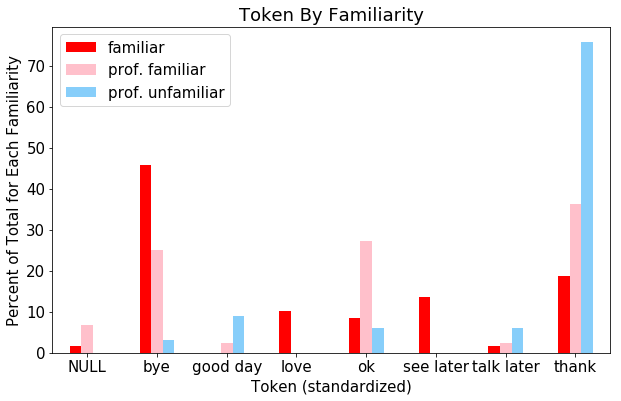

In [199]:
N = len(smaller)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


my_colors = ['red', 'pink', 'lightskyblue']

ax = percents.plot.bar(rot=0, color = my_colors)
ax.legend(['familiar', 'prof. familiar', 'prof. unfamiliar'])
plt.xticks(ind, smaller.index)
plt.title('Token By Familiarity')
plt.xlabel('Token (standardized)')
plt.ylabel('Percent of Total for Each Familiarity')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 15})

In [185]:
pd.DataFrame(smaller.sum(), columns=['total'])

,total
familiar,59.0
prof_f,44.0
prof_u,33.0


## Age

In [186]:
age = data['leave_taking_category'].groupby([data['leave_taking_category'], data['speaker_age_category']]).count()
age = age.unstack().fillna(0)
age_df= pd.DataFrame(age)
age_df.columns.name=None
age_df.index.name=None
age_df


,kid,young_adult,adult,old
NULL,0.0,2.0,1.0,1.0
bye,5.0,22.0,8.0,5.0
good day,0.0,1.0,2.0,1.0
love,0.0,4.0,1.0,1.0
ok,2.0,11.0,3.0,4.0
see later,0.0,8.0,0.0,0.0
talk later,0.0,2.0,0.0,2.0
thank,4.0,14.0,20.0,16.0


In [187]:
pd.DataFrame(age_df.sum(), columns=['total'])

,total
kid,11.0
young_adult,64.0
adult,35.0
old,30.0


In [200]:
percents = pd.DataFrame()
for column in age_df:
    percents[column]= 100 * (age_df[column] / age_df[column].sum())
percents

,kid,young_adult,adult,old
NULL,0.000000,3.1250,2.857143,3.333333
bye,45.454545,34.3750,22.857143,16.666667
good day,0.000000,1.5625,5.714286,3.333333
love,0.000000,6.2500,2.857143,3.333333
ok,18.181818,17.1875,8.571429,13.333333
see later,0.000000,12.5000,0.000000,0.000000
talk later,0.000000,3.1250,0.000000,6.666667
thank,36.363636,21.8750,57.142857,53.333333


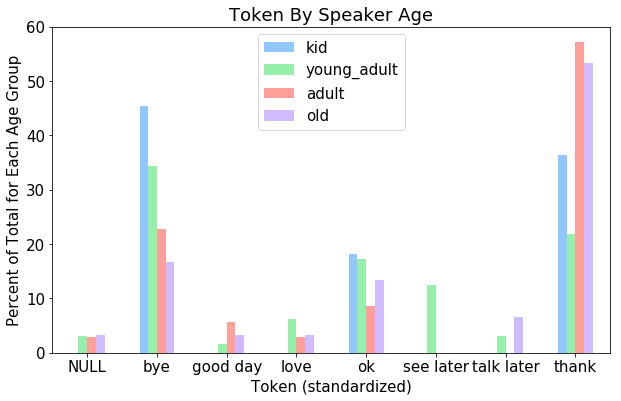

In [201]:
N = len(smaller)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


# my_colors = ['red', 'pink', 'lightskyblue']

ax = percents.plot.bar(rot=0)
# ax.legend(['familiar', 'prof. familiar', 'prof. unfamiliar'])
plt.xticks(ind, age_df.index)
plt.title('Token By Speaker Age')
plt.xlabel('Token (standardized)')
plt.ylabel('Percent of Total for Each Age Group')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 15})

## Channel

In [190]:
channel = data['leave_taking_category'].groupby([data['leave_taking_category'], data['channel']]).count()
channel = channel.unstack().fillna(0)
channel_df= pd.DataFrame(channel)
channel_df.columns.name=None
channel_df.index.name=None
channel_df

,person,phone
NULL,0.0,4.0
bye,11.0,29.0
good day,2.0,2.0
love,0.0,6.0
ok,3.0,17.0
see later,6.0,2.0
talk later,0.0,4.0
thank,5.0,49.0


In [191]:
totals = channel_df.sum()
pd.DataFrame(totals, columns=['total'])

,total
person,27.0
phone,113.0


In [202]:
percents = pd.DataFrame()
for column in channel_df:
    percents[column]= 100 * (channel_df[column] / totals[column])
percents

,person,phone
NULL,0.000000,3.539823
bye,40.740741,25.663717
good day,7.407407,1.769912
love,0.000000,5.309735
ok,11.111111,15.044248
see later,22.222222,1.769912
talk later,0.000000,3.539823
thank,18.518519,43.362832


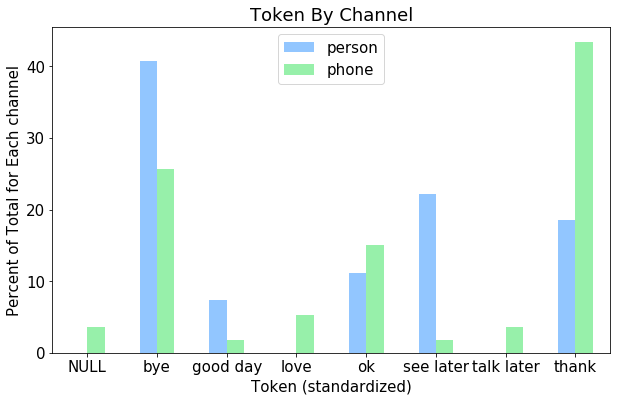

In [204]:
N = len(channel_df)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


# my_colors = ['red', 'pink', 'lightskyblue']

ax = percents.plot.bar(rot=0)
# ax.legend(['familiar', 'prof. familiar', 'prof. unfamiliar'])
plt.xticks(ind, channel_df.index)
plt.title('Token By Channel')
plt.xlabel('Token (standardized)')
plt.ylabel('Percent of Total for Each channel')
plt.rcParams['figure.figsize'] = [10, 6]
smaller.familiar = familiarity_df.familiar + familiarity_df.family + familiarity_df.friend + familiarity_df.relationship
plt.rcParams.update({'font.size': 15})

In [ ]:
data_copy = data
data.replace({'relationship': 'familiar', 'friend': 'familiar', 'family': 'familiar', 'unfamiliaramiliar': 'unfamiliar'}, regex=True, inplace=True)
# data.familiar = familiarity_df.familiar + familiarity_df.family + familiarity_df.friend + familiarity_df.relationship

familiarity = data['leave_taking_category'].groupby([data['leave_taking_category'], data['familiarity'], data['speaker_sex']]).count()
# print(familiarity.columns)
# familiarity = familiarity.unstack().fillna(0)
# familiarity = familiarity.fillna(method='ffill')
familiarity_df = pd.DataFrame(familiarity)
print(familiarity_df.columns)#.name=None
familiarity_df.index.name=None
familiarity.drop(['NULL', 'love', 'ok', 'good day', 'see later'], inplace=True)
print(familiarity.unstack())

# smaller = pd.DataFrame(columns = familiarity_df.columns, index = familiarity_df.index)
# smaller.unfamiliar = familiarity_df.unfamiliar
# smaller.prof_u, smaller.prof_f = familiarity_df.prof_u, familiarity.prof_f

In [ ]:
N = len(smaller)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence


my_colors = ['red', 'pink', 'lightskyblue']

ax = percents.plot.bar(rot=0, color = my_colors)
ax.legend(['familiar', 'prof. familiar', 'prof. unfamiliar'])
plt.xticks(ind, familiarity)
plt.title('Token By Familiarity and Sex')
plt.xlabel('Token (standardized)')
plt.ylabel('Percent of Total for Each Familiarity')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 15})

In [ ]:
familiarity.plot.bar()